In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import sklearn.linear_model
import datetime

In [49]:
grains = pd.read_csv('Downloads/Final_Project/Meat/Grains_Clean.csv')

In [50]:
meat_oil = pd.read_csv('Downloads/Final_Project/Meat/Meat_Oil_Clean.csv')

In [51]:
grains = grains.set_index(pd.date_range('1867-1-1', periods=150, freq='A'))

In [52]:
grains.head()

,Corn_Price,Barley_Price,Oats_Price,Sorghum_Price
1867-12-31 00:00:00,0.66,0.95,0.47,NaN
1868-12-31 00:00:00,0.78,1.22,0.59,NaN
1869-12-31 00:00:00,0.62,1.49,0.54,NaN
1870-12-31 00:00:00,0.73,0.87,0.46,NaN
1871-12-31 00:00:00,0.52,0.85,0.43,NaN


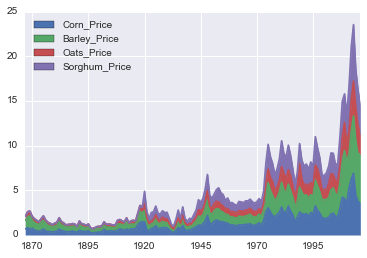

In [53]:
grains.plot.area()

In [54]:
grains.corr()

,Corn_Price,Barley_Price,Oats_Price,Sorghum_Price
Corn_Price,1.000000,0.946257,0.955720,0.991569
Barley_Price,0.946257,1.000000,0.971819,0.939369
Oats_Price,0.955720,0.971819,1.000000,0.942509
Sorghum_Price,0.991569,0.939369,0.942509,1.000000


In [55]:
meat_oil = meat_oil.set_index(pd.date_range('1986-1-1', periods=360, freq='M'))

In [56]:
meat_oil.head()

,Beef_Farm_Price,Beef_Wholesale_Price,Beef_Retail_Price,Pork_Farm_Price,Pork_Wholesale_Price,Pork_Retail_Price,Chicken_Retail_Price,Oil_Price
1986-01-31,129.0,152.6,232.9,85.55,104.15,178.80,119.59,22.93
1986-02-28,121.6,143.1,228.5,81.62,100.58,178.06,117.20,15.46
1986-03-31,120.4,141.0,226.4,76.90,97.11,175.42,115.46,12.61
1986-04-30,116.8,137.8,223.1,76.01,96.38,171.61,116.44,12.84
1986-05-31,121.0,142.8,222.9,89.83,108.04,171.71,116.49,15.38


In [57]:
def cents_to_dollars(x):
    return x/100

In [58]:
cent_prices = ['Beef_Farm_Price','Beef_Wholesale_Price', 'Beef_Retail_Price',
              'Pork_Farm_Price', 'Pork_Wholesale_Price', 'Pork_Retail_Price',
              'Chicken_Retail_Price']
beef_prices = ['Beef_Farm_Price','Beef_Wholesale_Price', 'Beef_Retail_Price']
pork_prices = ['Pork_Farm_Price', 'Pork_Wholesale_Price', 'Pork_Retail_Price']
retail_meat = ['Beef_Retail_Price', 'Pork_Retail_Price', 'Chicken_Retail_Price']

In [59]:
meat_oil[cent_prices] = meat_oil[cent_prices].apply(cents_to_dollars)

In [60]:
meat_oil.head()

,Beef_Farm_Price,Beef_Wholesale_Price,Beef_Retail_Price,Pork_Farm_Price,Pork_Wholesale_Price,Pork_Retail_Price,Chicken_Retail_Price,Oil_Price
1986-01-31,1.290,1.526,2.329,0.8555,1.0415,1.7880,1.1959,22.93
1986-02-28,1.216,1.431,2.285,0.8162,1.0058,1.7806,1.1720,15.46
1986-03-31,1.204,1.410,2.264,0.7690,0.9711,1.7542,1.1546,12.61
1986-04-30,1.168,1.378,2.231,0.7601,0.9638,1.7161,1.1644,12.84
1986-05-31,1.210,1.428,2.229,0.8983,1.0804,1.7171,1.1649,15.38


In [85]:
meat_oil_grains = meat_oil.join(grains, how='inner')

In [86]:
meat_oil_grains.head(24)

,Beef_Farm_Price,Beef_Wholesale_Price,Beef_Retail_Price,Pork_Farm_Price,Pork_Wholesale_Price,Pork_Retail_Price,Chicken_Retail_Price,Oil_Price,Corn_Price,Barley_Price,Oats_Price,Sorghum_Price
1986-12-31,1.2900,1.5010,2.3080,0.9552,1.1929,2.0240,1.3737,16.11,2.23,1.98,1.23,1.93
1987-12-31,1.3550,1.5540,2.4110,0.7766,1.1193,1.9636,1.1896,17.28,1.50,1.61,1.21,1.37
1988-12-31,1.5480,1.7410,2.5560,0.7751,1.0279,1.8769,1.4161,16.38,1.94,1.81,1.56,1.70
1989-12-31,1.6490,1.8380,2.6940,0.9328,1.1803,2.0229,1.4028,21.10,2.54,2.80,2.61,2.27
1990-12-31,1.7470,1.9940,2.9530,0.9067,1.2349,2.3615,1.4106,27.28,2.36,2.42,1.49,2.10
1991-12-31,1.4920,1.7180,2.7940,0.7280,1.0331,2.1255,1.4152,19.50,2.28,2.14,1.14,2.12
1992-12-31,1.6510,1.8420,2.8730,0.7825,1.0384,2.0769,1.4511,19.41,2.37,2.10,1.21,2.25
1993-12-31,1.5230,1.7060,2.8820,0.7525,1.0794,2.1276,1.4909,14.52,2.07,2.04,1.32,1.89
1994-12-31,1.4200,1.6430,2.7940,0.5962,0.9343,1.9933,1.3869,17.16,2.50,1.99,1.36,2.31
1995-12-31,1.3850,1.6280,2.8410,0.8192,1.0972,2.1393,1.4532,19.03,2.26,2.03,1.22,2.13


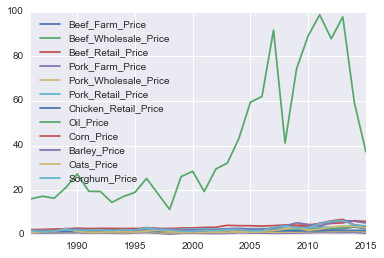

In [87]:
meat_oil_grains.plot()

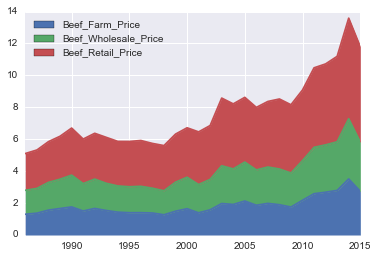

In [88]:
meat_oil_grains[beef_prices].plot.area()

In [89]:
meat_oil_grains[beef_prices].corr()

,Beef_Farm_Price,Beef_Wholesale_Price,Beef_Retail_Price
Beef_Farm_Price,1.000000,0.992868,0.939649
Beef_Wholesale_Price,0.992868,1.000000,0.965248
Beef_Retail_Price,0.939649,0.965248,1.000000


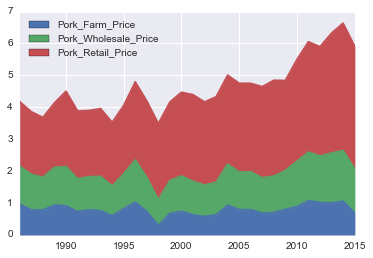

In [90]:
meat_oil_grains[pork_prices].plot.area()

In [91]:
meat_oil_grains[pork_prices].corr()

,Pork_Farm_Price,Pork_Wholesale_Price,Pork_Retail_Price
Pork_Farm_Price,1.000000,0.829671,0.330875
Pork_Wholesale_Price,0.829671,1.000000,0.775545
Pork_Retail_Price,0.330875,0.775545,1.000000


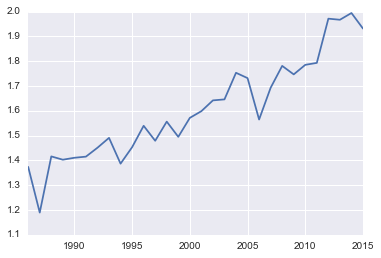

In [92]:
meat_oil_grains['Chicken_Retail_Price'].plot()

In [93]:
meat_oil_grains['Chicken_Retail_Price'].autocorr()

0.90047115707802006

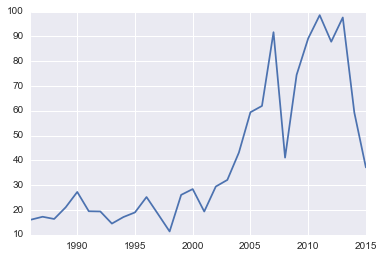

In [94]:
meat_oil_grains['Oil_Price'].plot()

In [95]:
meat_oil_grains['Oil_Price'].autocorr()

0.82597804766121186

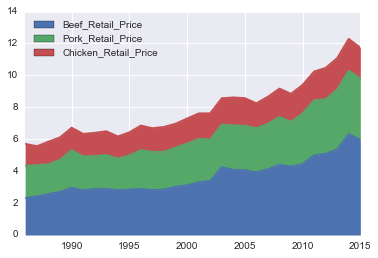

In [96]:
meat_oil_grains[retail_meat].plot.area()

In [97]:
meat_oil_grains[retail_meat].corr()

,Beef_Retail_Price,Pork_Retail_Price,Chicken_Retail_Price
Beef_Retail_Price,1.000000,0.967978,0.941476
Pork_Retail_Price,0.967978,1.000000,0.946063
Chicken_Retail_Price,0.941476,0.946063,1.000000


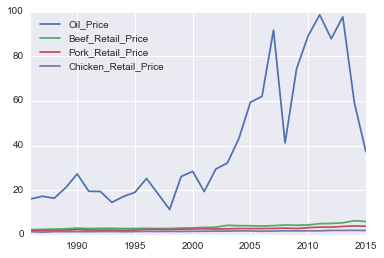

In [98]:
meat_oil_grains[['Oil_Price', 'Beef_Retail_Price', 'Pork_Retail_Price', 'Chicken_Retail_Price']].plot()

In [99]:
meat_oil_grains[['Oil_Price', 'Beef_Retail_Price', 'Pork_Retail_Price', 'Chicken_Retail_Price']].corr()

,Oil_Price,Beef_Retail_Price,Pork_Retail_Price,Chicken_Retail_Price
Oil_Price,1.000000,0.744931,0.749896,0.749405
Beef_Retail_Price,0.744931,1.000000,0.967978,0.941476
Pork_Retail_Price,0.749896,0.967978,1.000000,0.946063
Chicken_Retail_Price,0.749405,0.941476,0.946063,1.000000
